In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import Planck13, z_at_value
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
!ls

'COEF*R500 -- conn_clusters.jpg'
'coma_MGS_RaDecZ_XYZ:0.00|0.06.csv'
 _disperse_01
 _disperse_02
 _disperse_03
 _disperse_04
 DisPerSe.ipynb
 disperse_MGS_coma_2D.ipynb
 disperse_MGS_coma_cart.ipynb
 disperse_MGS_coma.ipynb
 disperse_sdss7_coma.ipynb
 DR5_cluster-catalog_v1.1.fits
 MCXC
 MGS
'MGS_cart_smooth:1_s:3_board:smooth_comaZ:0.00545|0.04135_V:04'
 MGS_coma_2D_ascii.txt
 MGS_coma_cart_ascii.txt
 README.md
 SDSS
 visual.ipynb


In [3]:
!ls MGS

main_gals-DR123a.fit  main_gals-DR5.fit  main_gals-EXTRA.fit
main_gals-DR123b.fit  main_gals-DR6.fit  main_gals-SPECIALa.fit
main_gals-DR4.fit     main_gals-DR7.fit  main_gals-SPECIALb.fit


In [4]:
# folder = 'MGS'
# files = [
#     'main_gals-DR123a.fit', 
#     'main_gals-DR123b.fit',
#     'main_gals-DR4.fit',
#     'main_gals-DR5.fit',
#     'main_gals-DR6.fit',
#     'main_gals-DR7.fit'
# ]

In [5]:
# t = Table.read(folder+'/'+files[0], format='fits')
# sorted(list(t.columns))

In [6]:
# dfs = []
# for file in files:
#     data = Table.read(folder+'/'+file, format='fits')
#     df = data[['ra', 'dec', 'zfinal', 'zconffinal', 'zwarning']].to_pandas()
#     dfs.append(df)

In [7]:
# full = pd.concat(dfs)

In [8]:
# full

In [9]:
# filtered = full.loc[full['zwarning'] == 0]
# filtered = filtered.loc[filtered['zconffinal'] > 0.35]
# filtered = filtered.loc[filtered['zfinal'] > 0.0]
# filtered = filtered.loc[filtered['ra'] > 90]
# filtered = filtered.loc[filtered['ra'] < 300]
# # filtered = filtered.loc[filtered['dec'] > 0]
# filtered = filtered.loc[(filtered['dec'] + 1.35*filtered['ra']-400) < 0]
# filtered

In [10]:
# fig = plt.figure(figsize=(18, 12))
# plt.scatter(filtered[['ra']], filtered[['dec']], s=2)
# x = np.linspace(100.,300.)
# k, b = -1.35, 400
# plt.plot(x, k*x+b, color='r')
# plt.xlim(100, 300)
# plt.ylim(-10, 80)

In [11]:
# filtered_rdz = filtered[['ra', 'dec', 'zfinal']]
# filtered_rdz.columns = ['RA', 'DEC', 'Z']
# filtered_rdz

In [12]:
# coma_ra_int = (120, 280)
# coma_dec_int = (-20, 80)
# coma_z_int = (0.000, 0.060)
# # coma_z_int = (0.006, 0.040)

# coma = filtered_rdz[
#         (coma_ra_int[0] < filtered_rdz['RA']) & (filtered_rdz['RA'] < coma_ra_int[1]) & \
#         (coma_dec_int[0] < filtered_rdz['DEC']) & (filtered_rdz['DEC'] < coma_dec_int[1]) & \
#         (coma_z_int[0] < filtered_rdz['Z']) & (filtered_rdz['Z'] < coma_z_int[1])
#     ]
# coma.reset_index(drop=True, inplace=True)

In [13]:
# coma

In [14]:
# CX = []
# CY = []
# CZ = []
# cosmo = Planck13
# for i in tqdm(range(coma.shape[0])):
#     c = SkyCoord(
#         ra=coma.iloc[i]['RA']*u.degree, 
#         dec=coma.iloc[i]['DEC']*u.degree,
#         distance=cosmo.comoving_distance(coma.iloc[i]['Z']),
#         frame='fk5'
#     )
#     c.representation_type = 'cartesian'
#     CX.append(c.x.value)
#     CY.append(c.y.value)
#     CZ.append(c.z.value)

In [15]:
# coma = coma.assign(CX=CX)
# coma = coma.assign(CY=CY)
# coma = coma.assign(CZ=CZ)
# coma

In [16]:
# coma.to_csv('coma_MGS_RaDecZ_XYZ:0.00|0.06.csv', index=False)

In [17]:
cosmo = Planck13

In [18]:
coma = pd.read_csv('coma_MGS_RaDecZ_XYZ:0.00|0.06.csv')
coma_ra_int = (130, 260)
coma_dec_int = (-10, 70)
coma_z_int = (0.00545, 0.04135)
coma = coma[
        (coma_ra_int[0] <= coma['RA']) & (coma['RA'] <= coma_ra_int[1]) & \
        (coma_dec_int[0] <= coma['DEC']) & (coma['DEC'] <=coma_dec_int[1]) & \
        (coma_z_int[0] <= coma['Z']) & (coma['Z'] <= coma_z_int[1])
    ]
coma.reset_index(drop=True, inplace=True)
coma

,RA,DEC,Z,CX,CY,CZ
0,146.714217,-1.041278,0.021265,-78.234023,51.362363,-1.701025
1,147.176391,-0.354031,0.006325,-23.476451,15.143235,-0.172623
2,146.751726,-0.408398,0.035831,-131.446368,86.174354,-1.120350
3,146.355774,-0.143377,0.030758,-112.460623,74.843849,-0.338046
4,146.299850,-0.120005,0.030694,-112.154018,74.797855,-0.282353
...,...,...,...,...,...,...
50952,259.398924,34.107623,0.038559,-25.748777,-137.573081,94.788537
50953,259.783099,33.571375,0.037837,-24.518062,-136.035405,91.738440
50954,259.763021,34.008389,0.038148,-24.639867,-136.437318,93.546355
50955,259.206415,31.755735,0.023720,-16.616680,-87.160705,54.920385


In [19]:
file_name = 'MGS_coma_cart_ascii.txt'
with open(file_name, 'w') as coma_f:
    coma_f.write('# px py pz\n')
    for i in range(coma.shape[0]):
        t = coma.iloc[i]
        coma_f.write(f'{t.CX}\t{t.CY}\t{t.CZ}\n')

In [20]:
VERSION = '04'
SIGMA = 3
SMOOTH = 1
BOARD = 'smooth'

In [21]:
!_disperse_{VERSION}/bin/delaunay_3D {file_name} -btype {BOARD} -smooth {SMOOTH}


reading MGS_coma_cart_ascii.txt (ASCII) ... done. (50957 lines)
Margin set to 0.0958159 (actual size is ~28.586).
Tesselating 50957 particles (3D) ... (+0 in boundary) done. (0.23s elapsed)
Circumsphere test was skipped.
Computing density ... done.
Building smooth boundaries (512 guards):  tesselation ...  generating ... cleaning up ... done. (+34444 particles)
Adding 34444 particles ... done.
Computing density ... done.
All done in 0.67 s.
Converting tesselation to NDnetwork ... done.
Smoothing 1 times ... done.
Will write network to file 'MGS_coma_cart_ascii.txt.NDnet'.
All done.

Network was saved as : MGS_coma_cart_ascii.txt.NDnet
   comment: 'No cosmological conversion.'
   3D-Network has 56451 vertices.
   periodicity: non-periodic.
   Available faces: 417101 1-F, 716134 2-F, 350560 3-F.
   Bounding box: x0=[-181.828,-163.968,-12.4004],
                 delta=[177.04,298.343,180.288].
   Available fields: 'field_value'(0), 'log_field_value'(0), 'mass'(0)
                     'in

In [22]:
!_disperse_{VERSION}/bin/mse {file_name}.NDnet -upSkl -forceLoops -nsig {SIGMA}


****** MSE v0.9.23 (64 bits) ******
Will read network from file 'MGS_coma_cart_ascii.txt.NDnet'.
Loading 3D network from file "MGS_coma_cart_ascii.txt.NDnet" ... done.
Computing 3-faces lists for vertice ... done.
Computing 2-faces lists for vertice ... done.
Building mask ... done. (15304 2-faces on boundary)
*********************************
Starting Morse-Smale complex computation.
Computing discrete gradient for 1540246 cells:
   Identifying (2,3)-cell pairs:
      Sorting 716134 2-cells (asc.) ... done.
      Computing MST ... (components) done.(670/350560 comp.)
      Computing discrete Gradient (670 comp.) ... done.
   Identifying (1,0)-cell pairs:
      Sorting 417101 1-cells (desc.) ... done.
      Computing MST ... (components) done.(5848/56451 comp.)
      Computing discrete Gradient (5848 comp.) ... done.
   Identifying (1,2)-cell pairs:
      Computing saddle-saddle DG ... done.
   Critical cells : 5848(+0) 0-cells, 17188(+17188) 1-cells, 12011(+12011) 2-cells, 670(+0) 3-

In [23]:
!_disperse_{VERSION}/bin/skelconv {file_name}.NDnet_s{SIGMA}.up.NDskl -breakdown -to NDskl_ascii

Will read skeleton from file 'MGS_coma_cart_ascii.txt.NDnet_s3.up.NDskl'.
Loading 3D skeleton from file MGS_coma_cart_ascii.txt.NDnet_s3.up.NDskl ... done.
Breaking down skeleton ... done.
Broken down skeleton has 1517(+417) nodes and 5521(-11175) segments.
Will write skeleton to file 'MGS_coma_cart_ascii.txt.NDnet_s3.up.NDskl.BRK.a.NDskl'.
Saving 3D skeleton to ASCII file MGS_coma_cart_ascii.txt.NDnet_s3.up.NDskl.BRK.a.NDskl ... done.


In [24]:
def read_skl_ascii_cart(file_name):
    cps = []
    fils = []
    with open(file_name) as f:
        s = ''
        while s != '[CRITICAL POINTS]':
            s = f.readline().strip()
        cp_num = int(f.readline().strip())
        for i in tqdm(range(cp_num)):
            cp = {}
            type_, cx, cy, cz, _, _, _ = tuple(map(float, f.readline().split()))
            c = SkyCoord(
                x=cx,
                y=cy,
                z=cz,
                frame='fk5',
                unit='Mpc',
                representation_type='cartesian'
            )
            c.representation_type = 'spherical'
            cp['RA'] = c.ra.value
            cp['DEC'] = c.dec.value
            cp['Z'] = z_at_value(cosmo.comoving_distance, c.distance)
            cp['CX'] = cx
            cp['CY'] = cy
            cp['CZ'] = cz
            cp['type'] = int(type_)
            cps.append(cp)
            for i in range(int(f.readline())):
                f.readline()
        
        while s != '[FILAMENTS]':
            s = f.readline().strip()
        fil_num = int(f.readline())
        for i in tqdm(range(fil_num)):
            fil = {}
            cp1, cp2, sp_num = tuple(map(int, f.readline().split()))
            fil['CP1_id'] = cp1
            fil['CP2_id'] = cp2
            fil['sample_points'] = []
            for j in range(sp_num):
                cx, cy, cz = tuple(map(float, f.readline().split()))
                c = SkyCoord(
                    x=cx,
                    y=cy,
                    z=cz,
                    frame='fk5',
                    unit='Mpc',
                    representation_type='cartesian'
                )
                c.representation_type = 'spherical'
                fil['sample_points'].append(
                    {
                        'RA': c.ra.value, 'DEC': c.dec.value,
                        'Z': z_at_value(cosmo.comoving_distance, c.distance),
                        'CX': cx, 'CY': cy, 'CZ': cz
                    }
                )
            fils.append(fil)
            
    return cps, fils

In [26]:
cps, fils = read_skl_ascii_cart(f'{file_name}.NDnet_s{SIGMA}.up.NDskl.BRK.a.NDskl')

100%|██████████| 1072/1072 [00:23<00:00, 45.90it/s]


In [27]:
!rm {file_name}.* test_smooth.dat

In [28]:
cps[0]

{'RA': 150.30107274383784,
 'DEC': -0.006603493179240451,
 'Z': 0.032715766083475796,
 'CX': -124.755,
 'CY': 71.1559,
 'CZ': -0.0165527,
 'type': 3}

In [29]:
fils[0]

{'CP1_id': 71,
 'CP2_id': 72,
 'sample_points': [{'RA': 226.62130795237127,
   'DEC': 10.139693680041047,
   'Z': 0.038242906609135034,
   'CX': -113.357,
   'CY': -119.961,
   'CZ': 29.5173},
  {'RA': 228.7362030835396,
   'DEC': 9.17510710895671,
   'Z': 0.038834050251502494,
   'CX': -110.837,
   'CY': -126.324,
   'CZ': 27.1441},
  {'RA': 230.56035375414112,
   'DEC': 8.532960330921682,
   'Z': 0.03928993016549137,
   'CX': -108.19,
   'CY': -131.527,
   'CZ': 25.5527},
  {'RA': 230.80327183762756,
   'DEC': 8.640421117372373,
   'Z': 0.03896379386981071,
   'CX': -106.716,
   'CY': -130.862,
   'CZ': 25.6593}]}

In [30]:
clusters = pd.read_csv('MCXC', delimiter='|')
clusters = clusters.drop('Unnamed: 0', axis=1)
clusters = clusters.drop('Unnamed: 9', axis=1)
clusters.columns = [
    'name', 'alt_name', 'RA', 'DEC', 'Z',
    'lx_500', 'mass_50', 'radius_500'
]

ra = []
dec = []
CX = []
CY = []
CZ = []
for i in tqdm(range(clusters.shape[0])):
    ra_split = clusters.iloc[i]['RA'].split()
    dec_split = clusters.iloc[i]['DEC'].split()
    c = SkyCoord(
        ra=float(ra_split[0])*u.hour + float(ra_split[1])*u.minute + float(ra_split[2])*u.second,
        dec=float(dec_split[0])*u.degree + float(dec_split[1])*u.arcminute + float(dec_split[2])*u.arcsecond,
        distance=cosmo.comoving_distance(clusters.iloc[i]['Z']),
        frame='fk5',
    )
    ra.append(c.ra.value)
    dec.append(c.dec.value)
    c.representation_type = 'cartesian'
    CX.append(c.x.value)
    CY.append(c.y.value)
    CZ.append(c.z.value)
clusters['RA'] = ra
clusters['DEC'] = dec
clusters['CX'] = CX
clusters['CY'] = CY
clusters['CZ'] = CZ
clusters = clusters[
        (coma_ra_int[0] <= clusters['RA']) & (clusters['RA'] <= coma_ra_int[1]) & \
        (coma_dec_int[0] <= clusters['DEC']) & (clusters['DEC'] <=coma_dec_int[1]) & \
        (coma_z_int[0] <= clusters['Z']) & (clusters['Z'] <= coma_z_int[1])
    ]
clusters = clusters[clusters['DEC'] > -8]
clusters = clusters[clusters['name'] != 'MCXC J1657.7-0149']
clusters = clusters[clusters['name'] != 'MCXC J1655.9-0113']
clusters = clusters[clusters['name'] != 'MCXC J1714.3+4341']
clusters = clusters[clusters['name'] != 'MCXC J1715.3+5724']
clusters = clusters[clusters['name'] != 'MCXC J1649.2+5325']
clusters.reset_index(drop=True, inplace=True)
clusters.head()

100%|██████████| 1743/1743 [00:02<00:00, 590.41it/s]


,name,alt_name,RA,DEC,Z,lx_500,mass_50,radius_500,CX,CY,CZ
0,MCXC J1231.0+0037,RXC J1231.0+0037,187.773333,0.628889,0.0232,2.234600e+42,1.981000e+13,0.4084,-101.131512,-13.805345,1.120378
1,MCXC J0920.0+0102,RXC J0920.0+0102,140.002083,1.040000,0.0175,1.174900e+42,1.344000e+13,0.3594,-59.053813,49.548374,1.399391
2,MCXC J1058.1+0135,RXC J1058.1+0135,164.543333,1.586389,0.0398,8.381300e+42,4.388000e+13,0.5296,-168.054667,46.468836,4.828888
3,MCXC J1506.4+0136,RXC J1506.4+0136,226.624167,1.605000,0.0060,1.106700e+42,1.305000e+13,0.3572,-18.196086,-19.258086,0.742379
4,MCXC J1058.2+0136,BVH2007 118,164.552917,1.615833,0.0385,6.677800e+42,3.823000e+13,0.5060,-162.620734,44.937019,4.759304


In [31]:
clusters['radius_500'].mean()

0.5737127659574468

In [32]:
clusters.shape

(47, 11)

In [33]:
def dist(x1, y1, z1, x2, y2, z2):
    return ((x1 - x2)*(x1 - x2) \
            + (y1 - y2)*(y1 - y2) \
            + (z1 - z2)*(z1 - z2))**0.5

In [34]:
num_conn_clasters = {}
for k in tqdm(range(1, 11)):
    RAD_COEF = k

    conn = [0] * clusters.shape[0]
    count = 0
    for fil in fils:
        fil['count'] = 0
    for i in range(clusters.shape[0]):
        c_x = clusters.iloc[i]['CX']
        c_y = clusters.iloc[i]['CY']
        c_z = clusters.iloc[i]['CZ']
        c_r = clusters.iloc[i]['radius_500']
        for j, fil in enumerate(fils):
            for p in fil['sample_points']:
                if dist(
                    p['CX'], p['CY'], p['CZ'],
                    c_x, c_y, c_z
                ) <= c_r * RAD_COEF:
                    fil['count'] = fil['count'] + 1
                    count += 1
                    conn[i] += 1
                    break
    num_conn_clasters[k] = sum(list(map(lambda x: int(x>0), conn)))

100%|██████████| 10/10 [00:03<00:00,  2.71it/s]


In [35]:
print(num_conn_clasters)

{1: 15, 2: 29, 3: 37, 4: 38, 5: 41, 6: 43, 7: 44, 8: 46, 9: 46, 10: 46}


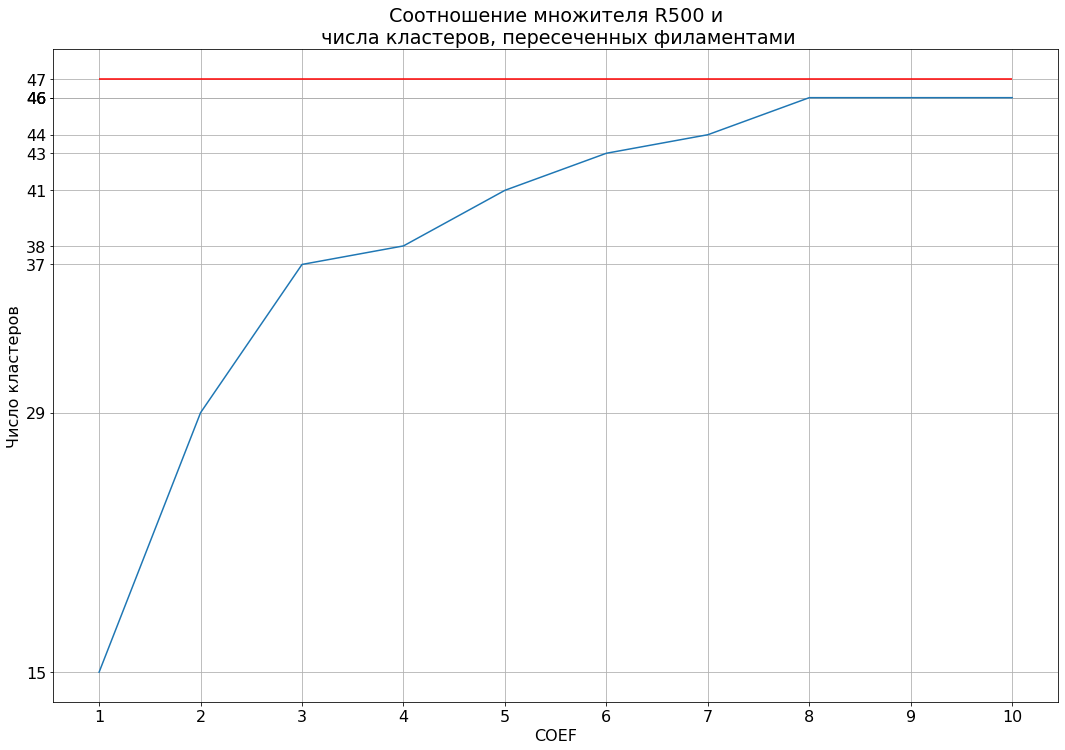

In [36]:
%matplotlib inline

coefs = list(num_conn_clasters.keys())
nums = list(num_conn_clasters.values())

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(18, 12))

plt.plot(coefs, nums)
plt.hlines(clusters.shape[0], min(coefs), max(coefs), color='r')
plt.grid()

plt.xticks(np.arange(min(coefs), max(coefs)+1, 1))
plt.yticks(nums + [clusters.shape[0]])
plt.xlabel('COEF')
plt.ylabel('Число кластеров')
plt.title(f'Соотношение множителя R500 и\n числа кластеров, пересеченных филаментами')
plt.savefig(f'COEF*R500 -- conn_clusters', format='jpg')

In [37]:
RAD_COEF = 1

conn = [0] * clusters.shape[0]
count = 0
for fil in fils:
    fil['count'] = 0
for i in tqdm(range(clusters.shape[0])):
    c_x = clusters.iloc[i]['CX']
    c_y = clusters.iloc[i]['CY']
    c_z = clusters.iloc[i]['CZ']
    c_r = clusters.iloc[i]['radius_500']
    for j, fil in enumerate(fils):
        for p in fil['sample_points']:
            if dist(
                p['CX'], p['CY'], p['CZ'],
                c_x, c_y, c_z
            ) <= c_r * RAD_COEF:
                fil['count'] = fil['count'] + 1
                count += 1
                conn[i] += 1
                break
clusters = clusters.assign(conn=conn)
print(len(fils), count)

100%|██████████| 47/47 [00:00<00:00, 108.96it/s]

1072 21


In [38]:
clusters['conn'].astype(bool).sum(), clusters.shape[0]

(15, 47)

In [39]:
clusters

,name,alt_name,RA,DEC,Z,lx_500,mass_50,radius_500,CX,CY,CZ,conn
0,MCXC J1231.0+0037,RXC J1231.0+0037,187.773333,0.628889,0.0232,2.234600e+42,1.981000e+13,0.4084,-101.131512,-13.805345,1.120378,0
1,MCXC J0920.0+0102,RXC J0920.0+0102,140.002083,1.040000,0.0175,1.174900e+42,1.344000e+13,0.3594,-59.053813,49.548374,1.399391,0
2,MCXC J1058.1+0135,RXC J1058.1+0135,164.543333,1.586389,0.0398,8.381300e+42,4.388000e+13,0.5296,-168.054667,46.468836,4.828888,0
3,MCXC J1506.4+0136,RXC J1506.4+0136,226.624167,1.605000,0.0060,1.106700e+42,1.305000e+13,0.3572,-18.196086,-19.258086,0.742379,0
4,MCXC J1058.2+0136,BVH2007 118,164.552917,1.615833,0.0385,6.677800e+42,3.823000e+13,0.5060,-162.620734,44.937019,4.759304,0
5,MCXC J1511.5+0145,RXC J1511.5+0145,227.889583,1.764167,0.0384,8.017700e+42,4.275000e+13,0.5252,-112.834158,-124.830406,5.182702,1
6,MCXC J1204.4+0154,RXC J1204.4+0154,181.105000,1.900556,0.0199,1.671220e+43,6.772000e+13,0.6158,-87.559537,-1.688873,2.906039,1
7,MCXC J1440.6+0328,RXC J1440.6+0328,220.159167,3.476389,0.0263,1.925670e+43,7.352000e+13,0.6316,-88.208830,-74.434548,7.011524,1
8,MCXC J1516.7+0701,RXC J1516.7+0701,229.183333,7.018611,0.0353,1.442058e+44,2.494500e+14,0.9465,-100.471432,-116.328845,18.923956,0
9,MCXC J1523.0+0836,RXC J1523.0+0836,230.772500,8.602500,0.0355,1.138819e+44,2.159800e+14,0.9020,-97.382808,-119.286179,23.295515,1


100%|██████████| 1072/1072 [00:00<00:00, 2360.47it/s]


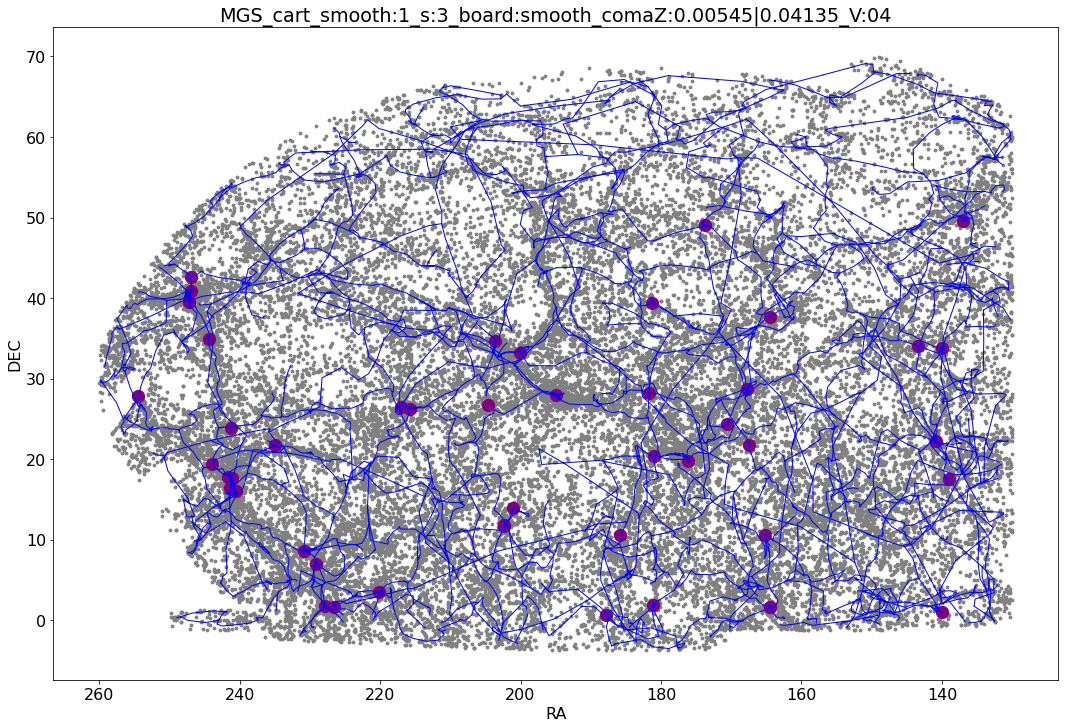

In [43]:
%matplotlib inline

font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(18, 12))

plt.scatter(coma['RA'], coma['DEC'], c='grey', s=8)

d = {4: 'xkcd:brown', 3: 'red', 2: 'green', 1: 'orange', 0: 'blue'}
x = []
y = []
c = []
for cp in cps:
    x.append(cp['RA'])
    y.append(cp['DEC'])
    c.append(d[cp['type']])
# plt.scatter(x, y, c=c, s=100)

for fil in tqdm(fils):
#     if fil['count'] == 0:
#         continue
    points = fil['sample_points']
    x = []
    y = []
    for i in range(len(points)):
        x.append(points[i]['RA'])
        y.append(points[i]['DEC'])
    plt.plot(x, y, 'b', linewidth=1)
    
plt.scatter(clusters['RA'], clusters['DEC'], color='purple', s=150, alpha=1)
    
ax = fig.get_axes()
ax[0].invert_xaxis()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title(f'MGS_cart_smooth:{SMOOTH}_s:{SIGMA}_board:{BOARD}_comaZ:{coma_z_int[0]}|{coma_z_int[1]}_V:{VERSION}')
plt.savefig(f'MGS_cart_smooth:{SMOOTH}_s:{SIGMA}_board:{BOARD}_comaZ:{coma_z_int[0]}|{coma_z_int[1]}_V:{VERSION}', format='jpg')

In [41]:
%matplotlib widget
# import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

100%|██████████| 1072/1072 [00:00<00:00, 1866.34it/s]


Text(0.5, 0.92, 'MGS_cart_smooth:1_s:3_board:smooth_comaZ:0.00545|0.04135_V:04')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
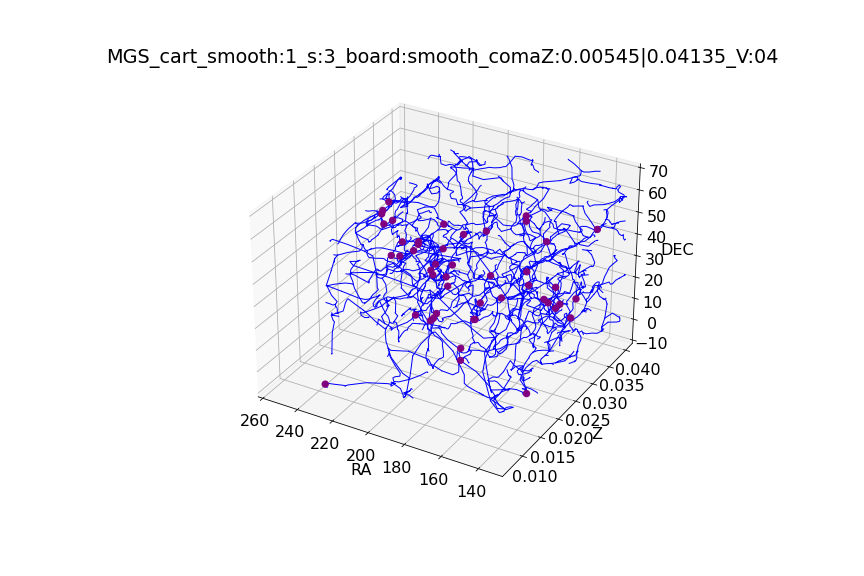

In [44]:
%matplotlib widget
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(coma_ra_int)
ax.set_zlim(coma_dec_int)
ax.set_ylim(coma_z_int)

# ax.scatter(coma['RA'], coma['Z'], coma['DEC'], c='grey', s=2, alpha=0.3)

d = {4: 'xkcd:brown', 3: 'red', 2: 'green', 1: 'orange', 0: 'blue'}
x = []
y = []
z = []
c = []
for cp in cps:
    x.append(cp['RA'])
    y.append(cp['DEC'])
    z.append(cp['Z'])
    c.append(d[cp['type']])
# ax.scatter(x, z, y, c=c, s=10)

for fil in tqdm(fils):
#     if fil['count'] == 0:
#         continue
    points = fil['sample_points']
    x = []
    y = []
    z = []
    for i in range(len(points)):
        x.append(points[i]['RA'])
        y.append(points[i]['DEC'])
        z.append(points[i]['Z'])
    ax.plot(x, z, y, 'b', linewidth=1)
    
ax.scatter(clusters['RA'], clusters['Z'], clusters['DEC'], color='purple', s=40, alpha=1)

ax.invert_xaxis()
ax.set_xlabel('RA')
ax.set_ylabel('Z')
ax.set_zlabel('DEC')
ax.set_title(f'MGS_cart_smooth:{SMOOTH}_s:{SIGMA}_board:{BOARD}_comaZ:{coma_z_int[0]}|{coma_z_int[1]}_V:{VERSION}')